# Lojistik regresyon:

0 veya 1 gibi sınıflandırma problemi olan durumlarda kullanılır.

Yani hedef değişken y şunlardan biridir:

- Hasta mı değil mi?

- Kazandı mı kaybetti mi?

- Erkek mi kadın mı?

- Sıfır mı bir mi?

Ama adı "regresyon" çünkü iç yapısında lineer regresyona benzer bir yapı kullanır.



Tıpkı Lineer Regresyonda olduğu gibi Lineer bir denklem kurulur. 

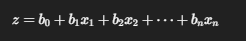

Buradaki z skorunu 0 ile 1 arasına sıkıştırmak için sigmoid adında bir aktivasyon fonksiyonu kullanılır.

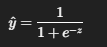


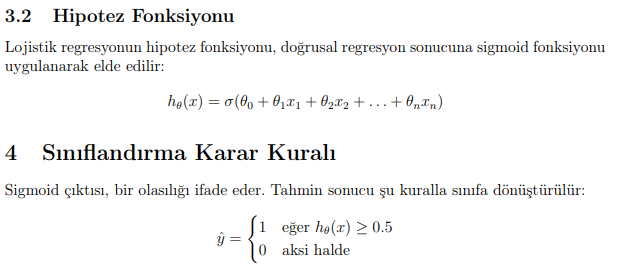

---
#  Logistic Regression for Multi-class Classification

## One-vs-Rest (OvR) (Diğer adı: One-vs-All)

## Mantık:
Her sınıf için ayrı bir model kurarsın.
Her model:

"Bu sınıf mı?" vs. "Diğer tüm sınıflar mı?"

🔧 Örneğin 3 sınıfın varsa: A, B, C
- Model 1: A mı? vs. (B + C)

- Model 2: B mi? vs. (A + C)

- Model 3: C mi? vs. (A + B)

→ Sonra, test verisini her modele uygularsın.

→ Hangi model en yüksek olasılığı verdiyse o sınıfa atarsın.

# One-vs-One (OvO)

## Mantık:
Her iki sınıf için bir model kurarsın.

Örneğin 3 sınıfın varsa: A, B, C
- Model 1: A vs B

- Model 2: A vs C

- Model 3: B vs C


#### Test verisi geldiğinde:

- Her model bir tahminde bulunur.

- Hangi sınıf daha fazla "oy" aldıysa o sınıf atanır.

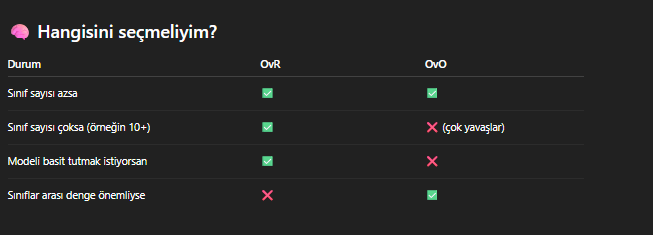

---
# Confusion Matrix

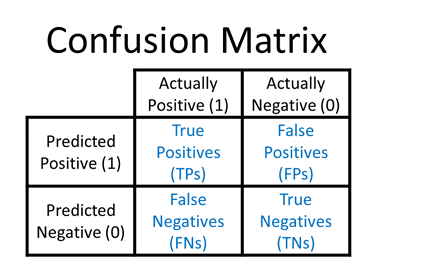

- Accuracy (Doğruluk) = (TP + TN) / (TP + TN + FP + FN)

Yani doğru tahminleri tüm tahminlere bölerek elde ettiğimiz değer bizim accuracy değerimiz oluyor.

-  Precision (Kesinlik) = TP / ( TP + FP )

Modelin pozitif tahminleri arasında, kaç tanesinin gerçekten pozitif olduğunu ölçer.

- Recall (Duyarlılık) = TP / (TP + FN)

Gerçek pozitif örneklerden kaç tanesini modelin doğru tahmin ettiğini gösterir.

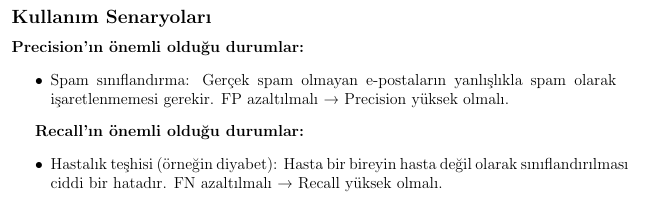

- F-skoru daima 0 ile 1 arasında bir değer alır. Bu değer 1’e yaklaştıkça modelin hem
 precision hem de recall açısından güçlü olduğu anlaşılır. F-skorunun 0’a yaklaşması ise
 modelin bu iki metrikten en az birinde ciddi sorunlar yaşadığını gösterir.

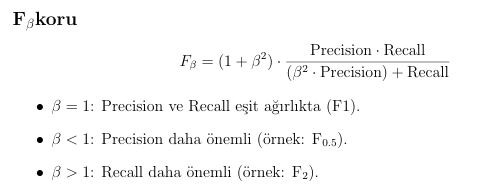

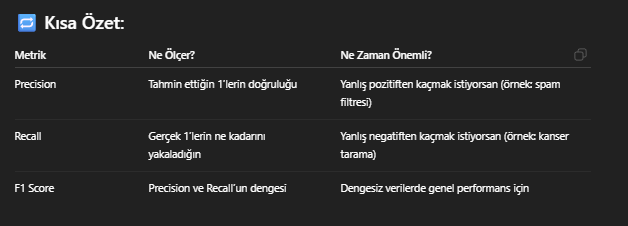

---
---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("17-bank_customers.csv")

In [3]:
df.head()

,age,job_satisfaction,balance,duration_last_call,num_contacts_last_month,has_housing_loan,has_personal_loan,communication_type,days_since_last_contact,campaign_response_score,subscribed
0,-0.377957,1.043895,1.043494,-0.101838,-1.617442,0.402713,0.913601,-0.067192,0.175471,-1.049646,0
1,-0.325259,1.276263,-0.686123,-2.463205,-0.489426,-0.240715,-1.469496,1.006633,-0.833692,0.957744,0
2,0.739019,-0.600903,-0.177294,1.335714,-0.817332,-0.790047,1.457365,-0.218981,0.878643,-1.257740,0
3,0.474312,-1.103002,1.189936,-0.800186,0.912377,-0.406451,-1.130950,1.985111,1.379029,1.041768,1
4,0.927365,1.114796,0.080284,1.261064,0.761179,0.921563,0.440832,0.184645,-1.567739,-0.142107,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   float64
 1   job_satisfaction         1000 non-null   float64
 2   balance                  1000 non-null   float64
 3   duration_last_call       1000 non-null   float64
 4   num_contacts_last_month  1000 non-null   float64
 5   has_housing_loan         1000 non-null   float64
 6   has_personal_loan        1000 non-null   float64
 7   communication_type       1000 non-null   float64
 8   days_since_last_contact  1000 non-null   float64
 9   campaign_response_score  1000 non-null   float64
 10  subscribed               1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


Baya temiz bir data temizlik vs yapmalık bir şey yok. Scale bile edilmiş değerlere baktığımız zaman o yüzden scale de etmeyeceğiz.

Hedef değişkenimiz subscribed.

In [5]:
X = df.drop('subscribed', axis = 1)
y = df['subscribed']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

In [8]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

Classifaction yaptığımız için artık gördüğümüz üzere 1 veya 0 olarak geliyor.

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score : ", score)

Accuracy Score :  0.932


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       121
           1       0.95      0.91      0.93       129

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [12]:
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))

Confusion Matrix : 
 [[115   6]
 [ 11 118]]


# Hyperparameter Tuning

Burada kullanılan parametreleri iyice anlamak için internette dokümantasyonuna bakabiliriz. Biz burada belli başlı kullanılanları vereceğiz.

In [13]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']    # Düzenleme (regularization) türünü belirler.
c_values = [100, 10, 1, 0.1, 0.01]    # Ceza gücü — regularization'ın şiddetini belirler (ters orantılı)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']    # Optimizasyon algoritması — çözüm yöntemi. Hepsi desteklemiyor. Google'la.

In [14]:
params = dict(penalty=penalty, C=c_values, solver=solver)

### StratifieldKFold

In [15]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

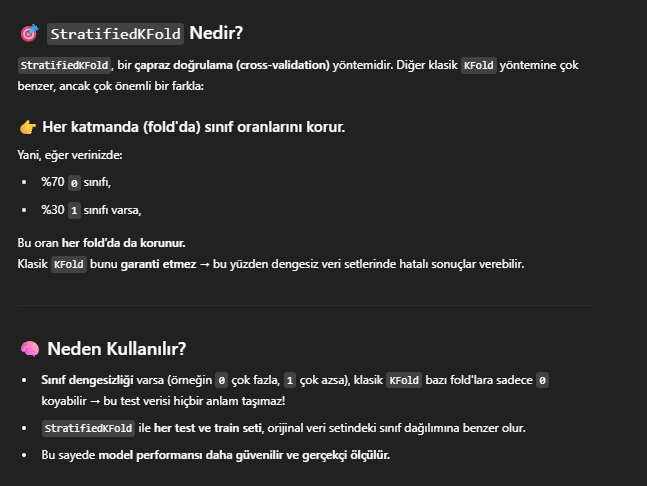

### GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV

- estimator (ZORUNLU). Bu, hangi modeli optimize etmek istediğini belirtir.
  
- param_grid (ZORUNLU). Bu parametre, denemek istediğin hiperparametre kombinasyonlarını belirtir.
  
- cv (ZORUNLU GİBİ – ama önerilen). Bu parametre, kaç katlı çapraz doğrulama yapılacağını belirler. Genellikle cv=5 ya da cv=StratifiedKFold(n_splits=5) kullanılır.

- scoring : Modelin her kombinasyonunu hangi metrikle değerlendireceğini belirtir. Eğer vermezsen modelin kendi score() fonksiyonu kullanılır (çoğunlukla accuracy).


- n_jobs : Aynı anda kaç işlemci çekirdeği kullanacağını belirler. n_jobs=-1 → tüm çekirdekleri kullanır → işlem çok hızlanır. Zorunlu değil ama şiddetle tavsiye edilir.

In [18]:
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=0)

verbose
Ekrana süreç hakkında bilgi yazdırır. Ne kadar detaylı çıktılar görmek istediğini belirler.

verbose=0 → sessiz

verbose=1 → temel bilgi

verbose=2 veya 3 → detaylı her adımı gösterir.

In [19]:
grid.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [21]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [22]:
grid.best_score_

0.9199999999999999

In [23]:
y_pred = grid.predict(X_test)

In [24]:
score=accuracy_score(y_pred,y_test)
print("score: " , score)
print(classification_report(y_pred,y_test))
print("confusion matrix: \n" , confusion_matrix(y_pred,y_test))

score:  0.932
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       130
           1       0.90      0.97      0.93       120

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

confusion matrix: 
 [[117  13]
 [  4 116]]


### ÖZET : 
Burada yaptıklarımızı kısaca özetleyelim. Hiperparametreleri kullandık.

GridSearchCV NEDİR?

GridSearchCV, adım adım:

- Seçtiğin modelin (örneğin LogisticRegression, SVM, RandomForest...) hiperparametrelerini farklı kombinasyonlarla dener.

- Her kombinasyonu çapraz doğrulama (cross-validation) yöntemiyle test eder.

- En yüksek başarıyı sağlayan parametreleri bulur (örneğin en iyi C değeri, penalty, solver vb.).

GridSearchCV içine verilmek üzere;

- İlk önce modelimizi oluşturduk. GridSearchCV içindeki `estimator` parametresi içine verdik LogisticRegression() türünden olmak üzere.

- İkinci olarak GridSearchCV içindeki `param_grid` parametresi için oluşturduğumuz penalty, c_values ve solver değerlerini dict olarak verdik.

- Üçüncü olarak ise `scoring` parametresini accuracy olarak verdik.

- Dördüncü olarak `cv` parametresi değerini öncesinde oluşturduğum StratifieldKFold() ile verdim.

- Bir de `n_jobs` değerini kaç çekirdek kullanılacağını belirlemek üzere -1 olarak verdik. Öneri bu şekildeydi.



---
# Randomized CV

RandomizedSearchCV, GridSearchCV'ye çok benzeyen ama daha hızlı çalışan alternatif bir hiperparametre arama yöntemidir. RandomizedSearchCV, modelin hiperparametrelerini rassal (rastgele) şekilde seçerek test eder.

Amaç yine aynı:
- En iyi hiperparametre kombinasyonunu bulmak.
- Ancak tüm kombinasyonları değil, belirli sayıda rastgele kombinasyonu dener.

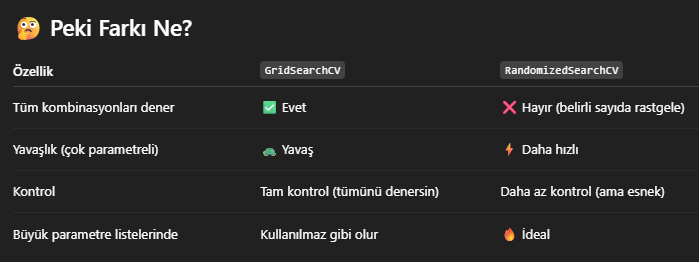

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator = model , param_distributions=params, cv = 5, scoring='accuracy')

In [27]:
randomcv.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _c

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [29]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

In [30]:
randomcv.best_score_

0.9199999999999999

In [31]:
y_pred = randomcv.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Acuuracy Score: ", score)
print(classification_report(y_test, y_pred))
print("Confusion Matrix: \n" , confusion_matrix(y_test, y_pred))

Acuuracy Score:  0.928
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       121
           1       0.97      0.88      0.93       129

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

Confusion Matrix: 
 [[118   3]
 [ 15 114]]
